# Classification du cancer du sein à l'aide du modèle Naive Bayes Gaussien:

## Introdutione et contexte:

Le cancer du sein est l’un des cancers les plus courants qui touchent les femmes et les personnes assignées de sexe féminin à la naissance. Cela se produit lorsque les cellules cancéreuses des seins se multiplient et deviennent des tumeurs. Environ 80 % des cas de cancer du sein sont invasifs, ce qui signifie qu'une tumeur peut se propager de votre sein à d'autres parties de votre corps.

Le cancer du sein touche généralement les femmes âgées de 50 ans et plus, mais il peut également toucher les femmes moins de 50 ans. Les hommes et les personnes assignées à la naissance comme un homme peuvent également développer un cancer du sein.

Dans ce projet, nous utiliserons l'ensemble de données du cancer du sein pour savoir si le cancer est malin ou bénin, en utilisant des informations telles que leur rayon moyen, leur compacité moyenne, la pire zone, etc.

Le projet vise à créer un classificateur d'apprentissage automatique qui, en utilisant les paramètres donnés de l'ensemble de données, prédit si la cellule est maligne (cancéreuse, 1) ou bénigne (non cancéreuse, 0) utilisons le modèle naive bayes gaussien.

## Description de l'ensemble de données

Cet ensemble de données sur le cancer du sein a été obtenu auprès des hôpitaux de l'Université du Wisconsin à Madison auprès du Dr William H. Wolberg.


L'ensemble de données contient 569 lignes et 6 colonnes.


- diagnosis : Ce serait notre variable cible, « 1 » signifie tumeur maligne (cancéreuse) et « 0 » signifie tumeur bénigne (non cancéreuse), alors on a une classification binaire.

- mean_radius : La Moyenne de la distance entre le centre et le périmètre de la cellule.
- mean_perimeter : La Moyenne du périmètre.
- mean_area : Moyenne de l'aire de la cellule.
- mean_texture : La Moyenne des valeurs d'échelle de gris.
- mean_smoothness : La Moyenne des longueurs de rayon.


## L'analyse exploratoire des données:

In [1]:
# Import des bibliothèques nécessaires
import numpy as np  # Import de la bibliothèque NumPy pour les opérations numériques
import pandas as pd  # Import de la bibliothèque Pandas pour la manipulation des données
from sklearn.naive_bayes import GaussianNB  # Import du modèle de classification Naive Bayes Gaussien
from sklearn.model_selection import train_test_split  # Import de la fonction pour diviser les données en ensembles d'entraînement et de test
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report # Import de métriques d'évaluation du modèle
import matplotlib.pyplot as plt  # Import de la bibliothèque Matplotlib pour la visualisation
import seaborn as sns  # Import de la bibliothèque Seaborn pour des graphiques améliorés

In [2]:
# Importation de dataset.
dataset = pd.read_csv('Breast_cancer_data.csv')

In [3]:
# Affichage des dix premières lignes du jeu de données.
dataset.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [4]:
# Afficher la taille du jeu de données
dataset.shape

(569, 6)

In [5]:
# Comptage des occurrences des types de données uniques dans notre DataFrame.
dataset.dtypes.value_counts()

float64    5
int64      1
Name: count, dtype: int64

- Nous pouvons voir que l'ensemble de données ne contient que des valeurs numériques, float et int.

In [6]:
# Affichage des informations concises sur la structure du jeu de données.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [7]:
# Affichage des statistiques descriptives pour les colonnes de dataset.
dataset.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


- Parfait, aucune des colonnes ne contient de valeurs manquantes.

In [8]:
# Compte du nombre d'occurrences de chaque class dans la colonne cible 'diagnosis'.
dataset['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

En totale on a:
- 357 pour la class 1.
- 212 pour la class 0.

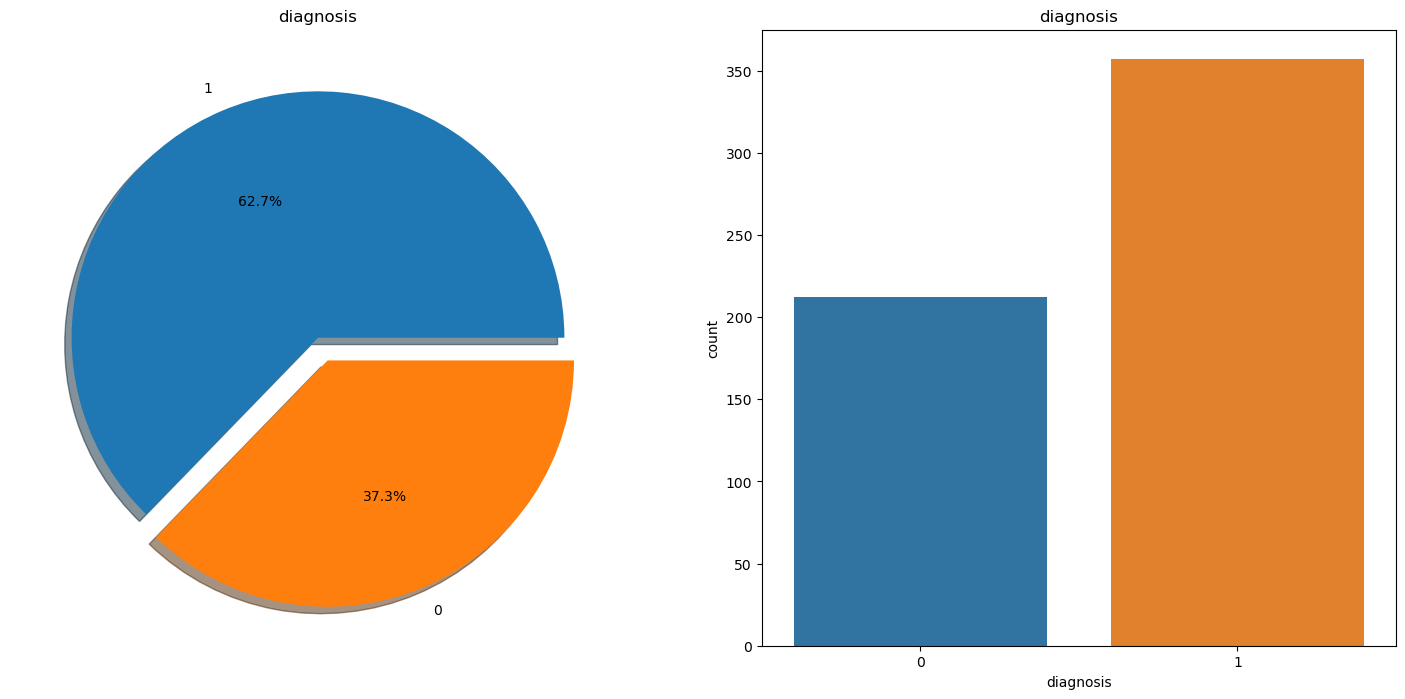

In [9]:
# Création d'une figure avec deux sous-graphiques pour visualiser la ditribution de notre colonne cible 'diagnosis'.
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Tracé du diagramme circulaire montrant la répartition des valeurs de la colonne 'diagnosis'
dataset['diagnosis'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

# Réglages du premier sous-graphique (diagramme circulaire)
ax[0].set_title('diagnosis')  # Titre du premier sous-graphique
ax[0].set_ylabel('')  # Suppression du libellé de l'axe y

# Tracé du diagramme de comptage montrant le décompte des valeurs de la colonne 'diagnosis'
sns.countplot(x='diagnosis', data=dataset, ax=ax[1])

# Réglages du deuxième sous-graphique (diagramme de comptage)
ax[1].set_title('diagnosis')  # Titre du deuxième sous-graphique

# Affichage de la figure avec les sous-graphiques
plt.show()

Le tracage de paires de toutes certaines des caractéristiques pertinentes est tracé, ce qui visualise la relation entre elles.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


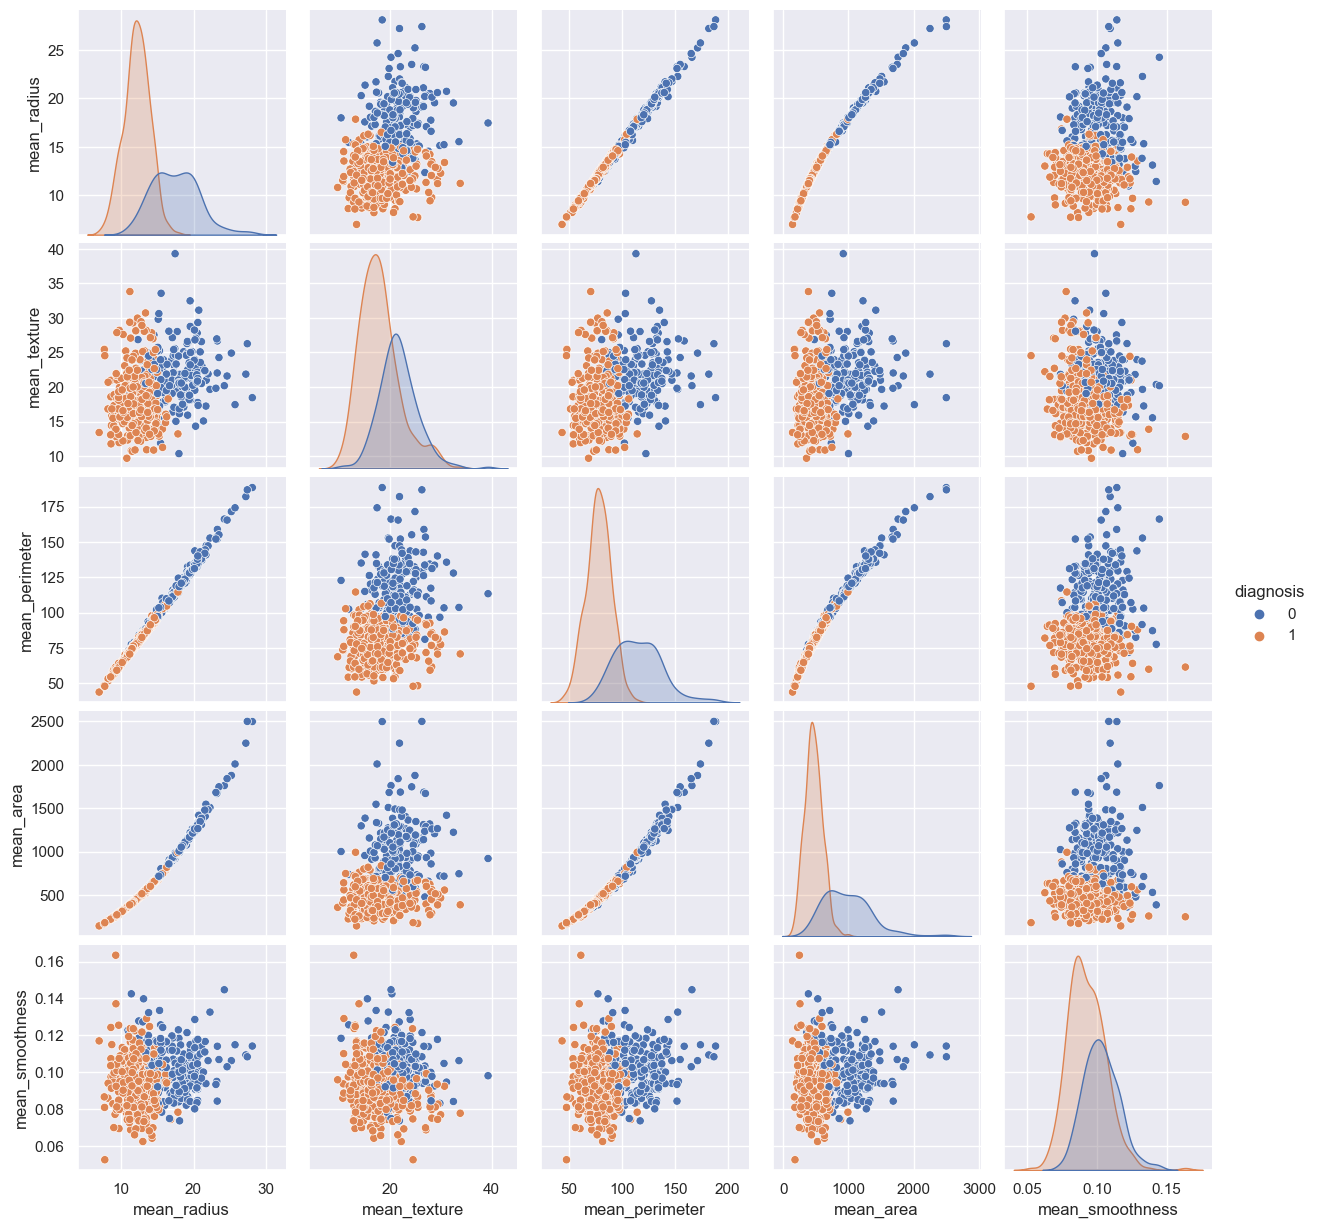

In [10]:
# Le pairplot d'un échantillon de fonctionnalités
sns.set()
cols = dataset.columns
sns.pairplot(dataset[cols],hue = 'diagnosis', height = 2.5)
plt.show();

- La couleur bleue représente la class 1 (tumeur maligne).
- la couleur orange représente la class 0 (tumeur bénigne).

## Prétraitement des données:

### Calcule de la corrélation:

- Est une méthode courante pour réduire le nombre de caractéristiques dans un ensemble de données.
- La corrélation mesure la relation et l'independance entre deux variables.
- Le modèle gaussien de naive bayes implique que tous les attributs doit etre independant pour calculer leur proba.

<Axes: >

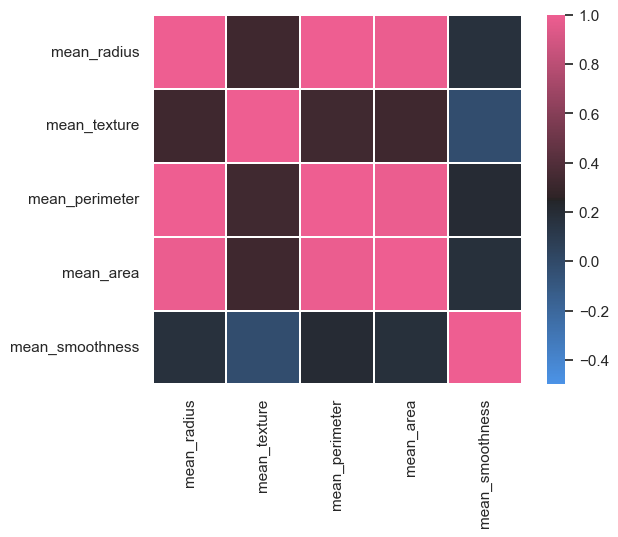

In [11]:
corr = dataset.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

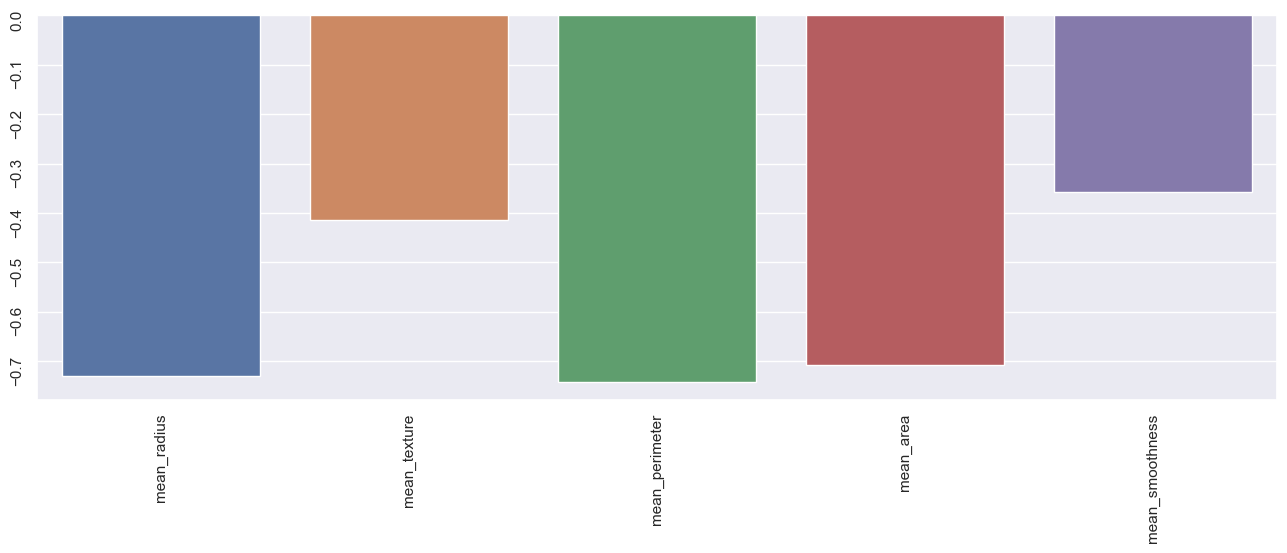

In [12]:
X = dataset.drop(['diagnosis'], axis = 1)

# Visualisation : diagramme à barres de la corrélation
plt.figure(figsize=(16, 5))  # Création d'une figure avec une taille spécifique

# Calcul de la corrélation entre les colonnes de 'df1' et la colonne 'diagnosis' de 'dataset'
correlation = X.corrwith(dataset['diagnosis'])

# Création du diagramme à barres pour visualiser la corrélation
ax = sns.barplot(x=correlation.index, y=correlation.values)
ax.tick_params(labelrotation=90)  # Réglages des paramètres des marqueurs sur l'axe x pour une rotation de 90 degrés


#### Nous pouvons clairement observer que les attributs "mean_riduas" et "mean_perimeter" ont une taux de corrélation tres elvee avec les autres attributs, ce qui signifie qu'ils sont dépendent avec les autres caractéristiques, nous devons donc les supprimer.

In [13]:
# Supprimer les attributs "mean_riduas" et "mean_perimeter".
dataset = dataset[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
dataset.head(10)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


##### Visualisation de diagramme à barres de la corrélation Apres le pretraitement de donnes.

<Axes: >

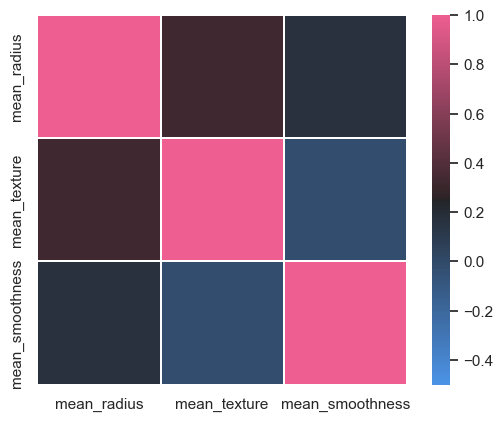

In [14]:
corr = dataset.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

<Axes: xlabel='mean_texture', ylabel='Count'>

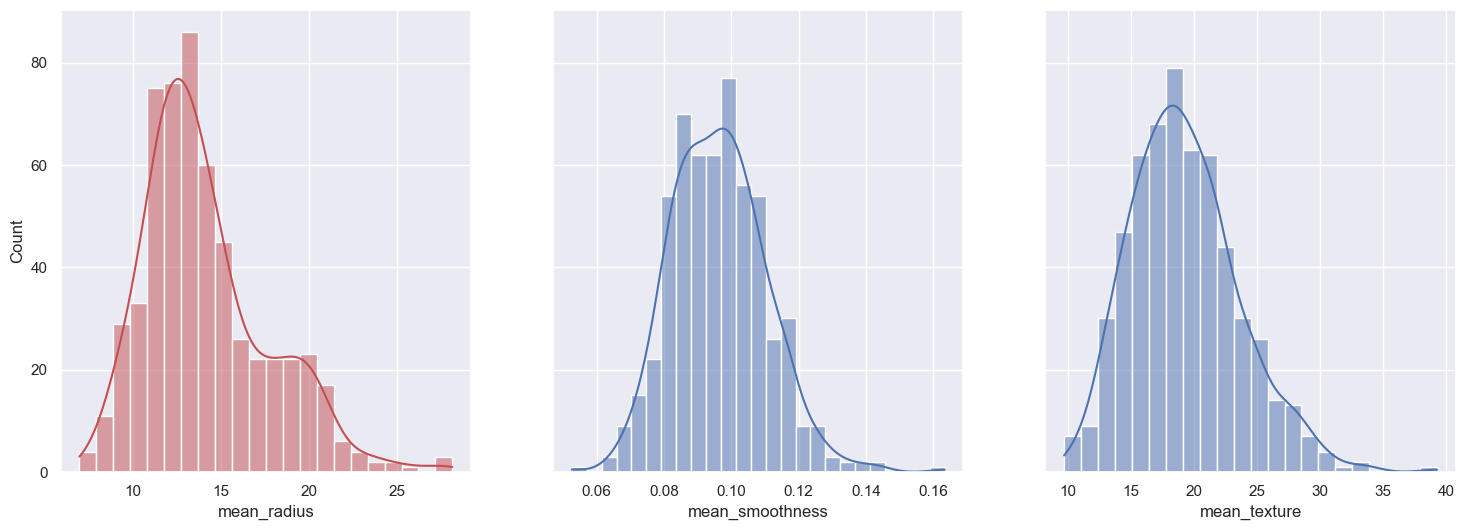

In [15]:
# Création d'une figure avec trois sous-graphiques en une ligne
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Tracé d'un histogramme avec estimation de la densité pour la colonne "mean_area"
sns.histplot(dataset, ax=axes[0], x="mean_radius", kde=True, color='r')

# Tracé d'un histogramme avec estimation de la densité pour la colonne "mean_smoothness"
sns.histplot(dataset, ax=axes[1], x="mean_smoothness", kde=True, color='b')

# Tracé d'un histogramme avec estimation de la densité pour la colonne "mean_texture"
sns.histplot(dataset, ax=axes[2], x="mean_texture", kde=True)


- Tous les 3 autres attributs donnent le même format de graphique, La courbe en cloche" or "La courbe de Gauss".

# Implémentation d'un modèle Gaussien pour une classification binaire en utilisant Python et la bibliothèque Sk-learn :

Le modèle naïf bayésien gaussien (Gaussian Naive Bayes en anglais) est une variante du classificateur naïf bayésien classique.
Ce modèle est souvent utilisé pour des tâches de classification où les caractéristiques sont continues et peuvent être modélisées par une distribution gaussienne, bien que son hypothèse de caractéristiques indépendantes (d'où le terme "naïf") puisse ne pas toujours correspondre à la réalité dans des situations plus complexes.

Ce modele calcule la priori et la vraisemblance pour estimer les probabilités a priori et les vraisemblances (probabilités conditionnelles) respectivement, afin de prédire les classes pour les exemples donnés.

La vraisemblance est calculée en utilisant la formule de la densité de probabilité de la distribution gaussienne pour les attributes étant donné la classe label: 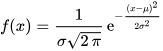
Avec:

x : La valeur pour laquelle on souhaite calculer la densité de probabilité.

μ : La moyenne de la distribution gaussienne.

σ : L'écart-type de la distribution gaussienne.

## Entrainement du modele:

In [16]:
# Separer les données en ensembles des caracteristiques X et colonne cible y.
X = dataset.iloc[:,:-1]
y = dataset['diagnosis']

In [17]:
# Divisez les données en ensembles d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialisation du modèle gaussien de naive bayes.
model = GaussianNB()

In [19]:
# Entrainement du modèle.
model.fit(X_train, y_train)

GaussianNB()

In [20]:
# Faire des prédictions sur l'ensemble de test.
y_pred = model.predict(X_test)

## Evaluation du modèle::

Précision : 0.9473684210526315
Score F1 : 0.9583333333333334


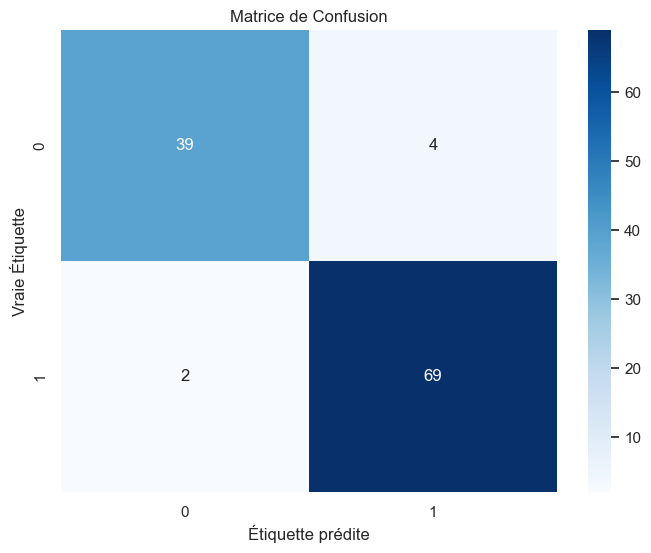

In [21]:
# Affichage de la précision du modèle
print(f"Précision : {accuracy_score(y_test, y_pred)}")

# Affichage du score F1 du modèle
print(f"Score F1 : {f1_score(y_test, y_pred)}")

# Tracé de la matrice de confusion
plt.figure(figsize=(8, 6))  # Création d'une figure avec une taille spécifique
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.xlabel('Étiquette prédite')  # Libellé de l'axe x
plt.ylabel('Vraie Étiquette')  # Libellé de l'axe y
plt.title('Matrice de Confusion')  # Titre de la matrice de confusion
plt.show()  # Affichage de la matrice de confusion


In [22]:
# Afficher le rapport de classification.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



- Précision (precision) : Pour la classe 0, le modèle prédit correctement 95% des instances prédites comme appartenant à la classe 0. Aussi la meme chose pour la classe 1.

- Rappel (recall) : Pour la classe 0, le modèle identifie correctement 91% des vraies instances de la classe 0. Pour la classe 1, il identifie correctement 97% des vraies instances de la classe 1.

- F1-score : C'est une mesure qui combine à la fois la précision et le rappel en une seule métrique. Pour la classe 0, le score F1 est de 93%, et pour la classe 1, il est de 96%.

- Accuracy (précision globale) : Le modèle a une précision globale de 95%. Il prédit correctement la classe de 95% des instances du jeu de données.